<a href="https://colab.research.google.com/github/ayubuinelektrikndk/Pemrograman_Python/blob/main/Prediksi_Curah_Hujan_Menggunakan_Algoritma_RF_%26_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Bandung Hourly.csv to Bandung Hourly.csv


# Data Processing and Analysis


## Data Processing

In [2]:
import pandas as pd

# Memberi nama pada header
colnames = ["timestamp","ptemp_c","rh","rain_mm_tot","radiasi_avg"]
# Data masih permenit
df = pd.read_csv("Bandung Hourly.csv", sep=";", names=colnames)
df

,timestamp,ptemp_c,rh,rain_mm_tot,radiasi_avg
0,07/01/2020 15:00,26.85,121.2,0.0,0.00
1,07/01/2020 15:00,26.85,121.2,0.0,0.00
2,08/01/2020 11:00,29.54,82.0,0.0,528.10
3,08/01/2020 12:00,31.40,60.1,0.0,508.60
4,08/01/2020 13:00,32.55,45.4,0.0,576.20
...,...,...,...,...,...
23983,31/12/2021 20:00,25.93,73.6,0.0,13.43
23984,31/12/2021 21:00,25.34,71.7,0.0,13.42
23985,31/12/2021 22:00,25.06,73.2,0.0,13.37
23986,31/12/2021 23:00,25.12,73.7,0.0,13.36


In [3]:
# Untuk Menampilkan count,mean,std,min,25%,50%,75% dan max
df.describe()

,ptemp_c,rh,rain_mm_tot,radiasi_avg
count,23988.000000,23988.000000,23988.000000,23988.000000
mean,26.878002,80.879686,0.233529,147.893491
std,4.568997,13.632232,1.588554,217.478420
min,16.230000,22.800000,0.000000,-2.000000
25%,23.360000,70.900000,0.000000,6.231000
50%,25.170000,83.500000,0.000000,18.460000
75%,30.390000,92.300000,0.000000,234.625000
max,43.420000,121.200000,51.200000,1042.000000


In [4]:
# Mengubah'timestamp' menjadi 'date'
df["date"] = df.timestamp.apply(lambda t: t.split(" ")[0])
df["date"] = df.date.apply(lambda t: "/".join(reversed(t.split("/"))))
df

,timestamp,ptemp_c,rh,rain_mm_tot,radiasi_avg,date
0,07/01/2020 15:00,26.85,121.2,0.0,0.00,2020/01/07
1,07/01/2020 15:00,26.85,121.2,0.0,0.00,2020/01/07
2,08/01/2020 11:00,29.54,82.0,0.0,528.10,2020/01/08
3,08/01/2020 12:00,31.40,60.1,0.0,508.60,2020/01/08
4,08/01/2020 13:00,32.55,45.4,0.0,576.20,2020/01/08
...,...,...,...,...,...,...
23983,31/12/2021 20:00,25.93,73.6,0.0,13.43,2021/12/31
23984,31/12/2021 21:00,25.34,71.7,0.0,13.42,2021/12/31
23985,31/12/2021 22:00,25.06,73.2,0.0,13.37,2021/12/31
23986,31/12/2021 23:00,25.12,73.7,0.0,13.36,2021/12/31


In [5]:
# Mencari rata-rata dari semua data fitur kecuali rain_mm_tot
df2 = df[["date","ptemp_c","rh","radiasi_avg"]]
df2 = df2.groupby("date").mean().reset_index()
df2


,date,ptemp_c,rh,radiasi_avg
0,2020/01/07,26.850000,121.200000,0.000000
1,2020/01/08,26.298462,81.453846,169.941154
2,2020/01/09,23.668750,94.620833,76.295583
3,2020/01/10,25.654583,80.208333,167.663375
4,2020/01/11,26.198750,72.895833,156.473833
...,...,...,...,...
721,2021/12/28,27.280417,86.641667,156.265417
722,2021/12/29,27.242500,85.912500,132.077500
723,2021/12/30,27.566250,85.891667,128.480417
724,2021/12/31,28.412500,78.904167,142.060833


In [6]:
# Menjumlahkan semua data fitur "rain_mm_tot"
df3 = df[["date","rain_mm_tot"]]
df3 = df3.groupby("date").sum().reset_index()
df3


,date,rain_mm_tot
0,2020/01/07,0.0
1,2020/01/08,27.2
2,2020/01/09,37.6
3,2020/01/10,4.0
4,2020/01/11,0.0
...,...,...
721,2021/12/28,0.1
722,2021/12/29,5.4
723,2021/12/30,0.0
724,2021/12/31,0.0


In [7]:
# Menggabungkan data fitur yang sudah di rata-ratakan dan data fitur yang sudah dijumlahkan
df = pd.merge(df2,df3, on="date")
df

,date,ptemp_c,rh,radiasi_avg,rain_mm_tot
0,2020/01/07,26.850000,121.200000,0.000000,0.0
1,2020/01/08,26.298462,81.453846,169.941154,27.2
2,2020/01/09,23.668750,94.620833,76.295583,37.6
3,2020/01/10,25.654583,80.208333,167.663375,4.0
4,2020/01/11,26.198750,72.895833,156.473833,0.0
...,...,...,...,...,...
721,2021/12/28,27.280417,86.641667,156.265417,0.1
722,2021/12/29,27.242500,85.912500,132.077500,5.4
723,2021/12/30,27.566250,85.891667,128.480417,0.0
724,2021/12/31,28.412500,78.904167,142.060833,0.0


In [8]:
# Kategori Hujan 
def generate_label(rain_density):
    if rain_density < 0.5:
        return "Berawan"
    elif 0.5 <= rain_density < 20:
        return "Hujan Ringan"
    elif 20 <= rain_density < 50:
        return "Hujan Sedang"
    elif 50 <= rain_density < 100:
        return "Hujan Lebat"
    elif 100 <= rain_density < 150:
        return "Hujan Sangat Lebat"
    elif  rain_density >= 150:
        return "Hujan Ekstrem"


df["label"] = df.rain_mm_tot.apply(generate_label)
df

,date,ptemp_c,rh,radiasi_avg,rain_mm_tot,label
0,2020/01/07,26.850000,121.200000,0.000000,0.0,Berawan
1,2020/01/08,26.298462,81.453846,169.941154,27.2,Hujan Sedang
2,2020/01/09,23.668750,94.620833,76.295583,37.6,Hujan Sedang
3,2020/01/10,25.654583,80.208333,167.663375,4.0,Hujan Ringan
4,2020/01/11,26.198750,72.895833,156.473833,0.0,Berawan
...,...,...,...,...,...,...
721,2021/12/28,27.280417,86.641667,156.265417,0.1,Berawan
722,2021/12/29,27.242500,85.912500,132.077500,5.4,Hujan Ringan
723,2021/12/30,27.566250,85.891667,128.480417,0.0,Berawan
724,2021/12/31,28.412500,78.904167,142.060833,0.0,Berawan


In [9]:
# Untuk mengetahui jumlah kategori perlabel
col_names = ["label"]

for col in col_names:
    
    print(df[col].value_counts()) 

Berawan               372
Hujan Ringan          281
Hujan Sedang           56
Hujan Lebat            10
Hujan Ekstrem           4
Hujan Sangat Lebat      3
Name: label, dtype: int64


## Data Visualization

### Correlation

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn-whitegrid")

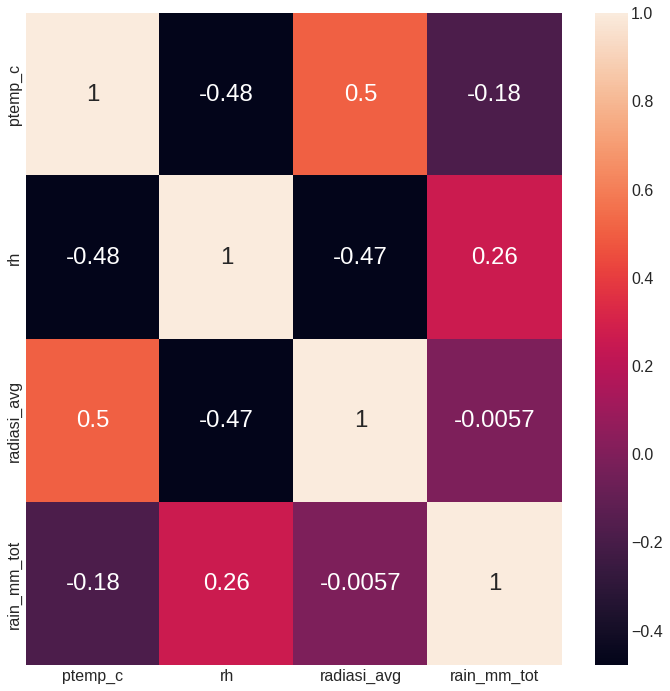

In [11]:
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(df.iloc[:, 1:-1].corr(), annot=True, annot_kws={"size": 24})
heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize=16)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize=16)
colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=16)
plt.savefig("correlation.png")

### Histogram

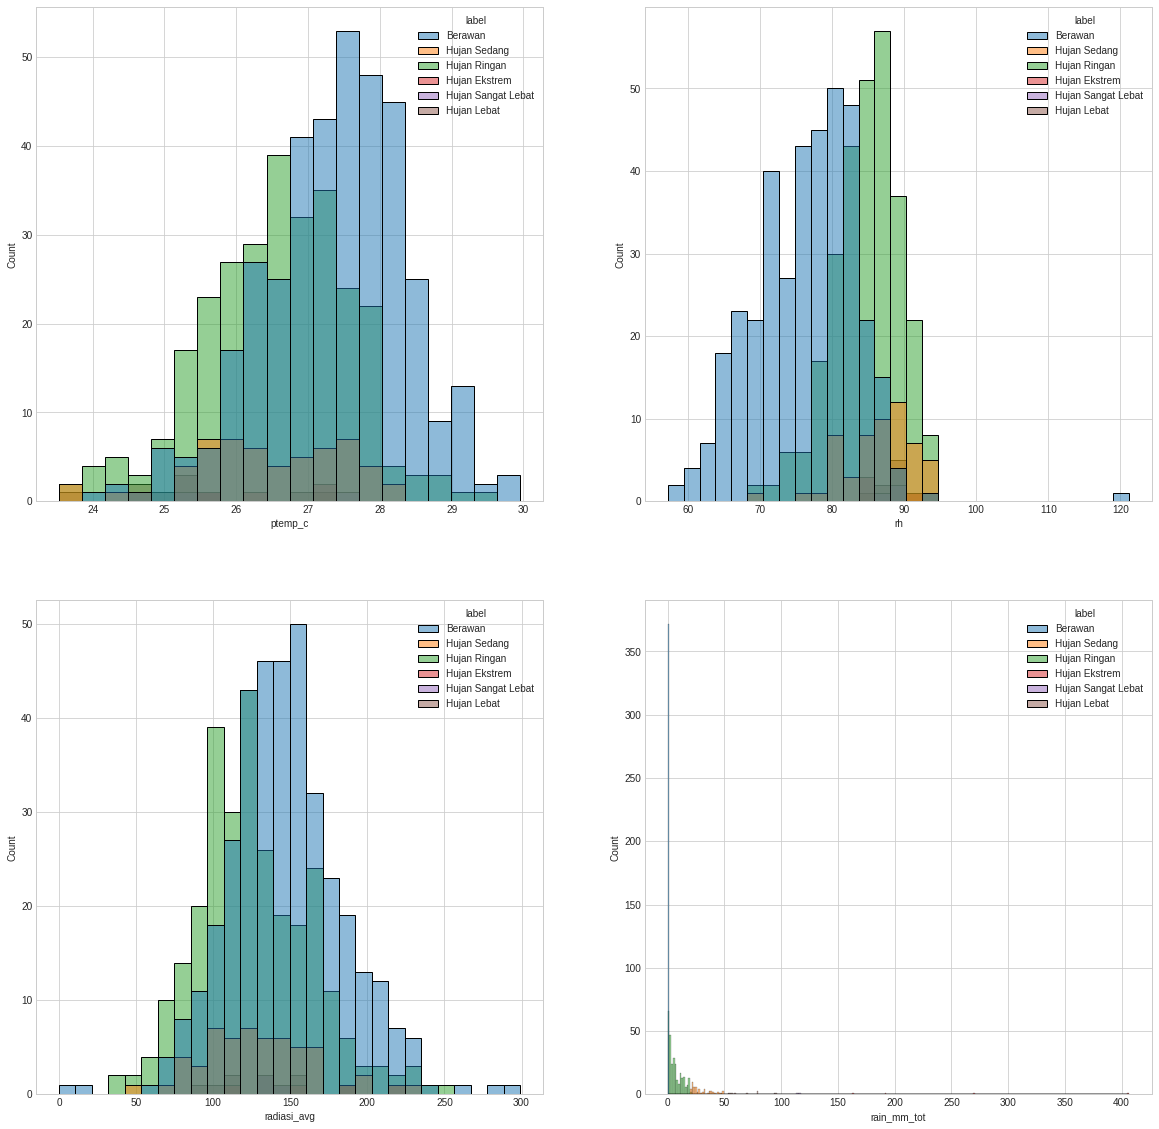

In [12]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(df.columns[1:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=df, x=col, hue="label")
plt.savefig("distribution.png")

### Label Distribution

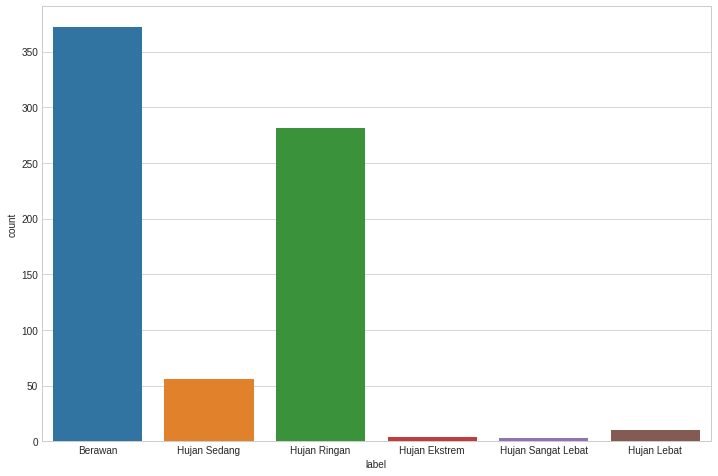

In [13]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x="label")
plt.savefig("labeldist.png")

## Data to Features

In [14]:
label_to_idx = {v: k for k, v in enumerate(sorted(df.label.unique()))}
idx_to_label = sorted(df.label.unique())
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1].apply(lambda l: label_to_idx[l])

## Modelling Library

In [15]:
import time
import random
import numpy as np
from time import time
from sklearn import metrics
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

### Random Forest

In [16]:
random.seed(2022)
np.random.seed(2022)
rf = RandomForestClassifier(n_estimators=100, max_depth=10)

elapsed_train_time = []
elapsed_test_time = []
scores = []
for idx_train, idx_test in model_selection.StratifiedKFold(3).split(X, y):
    X_train, X_test = X.iloc[idx_train], X.iloc[idx_test]
    y_train, y_test = y.iloc[idx_train], y.iloc[idx_test]

    X_mean = np.mean(X_train, axis=0)
    X_std = np.mean(X_train, axis=0)

    X_train = (X_train - X_mean) / X_std
    X_test = (X_test - X_mean) / X_std

    start_time = time()
    rf.fit(X_train, y_train)
    elapsed_train_time.append(time() - start_time)

    start_time = time()
    y_pred = rf.predict(X_test)
    end_time = time() - start_time

    elapsed_test_time.append(time() - start_time)

    scores.append(
        metrics.classification_report(
            y_test, y_pred, target_names=idx_to_label, zero_division=0, output_dict=True
        )
    )

In [17]:
running_mean_train = np.mean(elapsed_train_time).round(4)
running_std_train = np.std(elapsed_train_time).round(4)
print("Training Time (s)")
print(f"Mean: {running_mean_train}")
print(f"Standard Deviation: {running_std_train}")

Training Time (s)
Mean: 0.1618
Standard Deviation: 0.0006


In [18]:
running_mean_test = np.mean(elapsed_test_time).round(4)
running_std_test = np.std(elapsed_test_time).round(4)
print("Testing Time (s)")
print(f"Mean: {running_mean_test}")
print(f"Standard Deviation: {running_std_test}")

Testing Time (s)
Mean: 0.0156
Standard Deviation: 0.0015


In [19]:
scores = pd.json_normalize(scores, sep=" ")
scores.columns = [t.title() for t in scores.columns]
scores = scores.round(4) * 100
scores["Training Time"] = elapsed_train_time
scores["Testing Time"] = elapsed_test_time

scores.to_excel("rfscores.xlsx")
scores

,Accuracy,Berawan Precision,Berawan Recall,Berawan F1-Score,Berawan Support,Hujan Ekstrem Precision,Hujan Ekstrem Recall,Hujan Ekstrem F1-Score,Hujan Ekstrem Support,Hujan Lebat Precision,...,Macro Avg Precision,Macro Avg Recall,Macro Avg F1-Score,Macro Avg Support,Weighted Avg Precision,Weighted Avg Recall,Weighted Avg F1-Score,Weighted Avg Support,Training Time,Testing Time
0,99.17,100.0,100.0,100.0,12400,0.0,0.0,0.0,100,60.0,...,60.00,66.67,62.50,24200,98.68,99.17,98.86,24200,0.161491,0.017711
1,98.76,100.0,100.0,100.0,12400,0.0,0.0,0.0,200,50.0,...,58.33,66.67,61.11,24200,98.14,98.76,98.35,24200,0.161256,0.014771
2,96.69,99.2,100.0,99.6,12400,0.0,0.0,0.0,100,50.0,...,71.57,67.88,69.03,24200,95.90,96.69,96.22,24200,0.162725,0.014299


In [20]:
result = pd.DataFrame(
    [scores.mean(axis=0), scores.std(axis=0)], index=["Mean", "Standard Deviation"]
)
result = result[
    [
        col
        for col in result.columns
        if "F1-Score" in col
        or "Precision" in col
        or "Recall" in col
        or "Accuracy" in col
        or col == "Training Time"
        or col == "Testing Time"
    ]
].T

result.to_excel("rfresult.xlsx")
result

,Mean,Standard Deviation
Accuracy,98.206667,1.329373
Berawan Precision,99.733333,0.461880
Berawan Recall,100.000000,0.000000
Berawan F1-Score,99.866667,0.230940
Hujan Ekstrem Precision,0.000000,0.000000
Hujan Ekstrem Recall,0.000000,0.000000
Hujan Ekstrem F1-Score,0.000000,0.000000
Hujan Lebat Precision,53.333333,5.773503
Hujan Lebat Recall,75.000000,43.301270
Hujan Lebat F1-Score,58.333333,22.050447


### Artificial Neural Network

In [21]:
random.seed(2022)
np.random.seed(2022)
mlp = MLPClassifier(hidden_layer_sizes=200, learning_rate_init=1e-2)

elapsed_train_time = []
elapsed_test_time = []
scores = []
for idx_train, idx_test in model_selection.StratifiedKFold(3).split(X, y):
    X_train, X_test = X.iloc[idx_train], X.iloc[idx_test]
    y_train, y_test = y.iloc[idx_train], y.iloc[idx_test]

    X_mean = np.mean(X_train, axis=0)
    X_std = np.mean(X_train, axis=0)

    X_train = (X_train - X_mean) / X_std
    X_test = (X_test - X_mean) / X_std

    start_time = time()
    mlp.fit(X_train, y_train)
    elapsed_train_time.append(time() - start_time)

    start_time = time()
    y_pred = mlp.predict(X_test)
    end_time = time() - start_time

    elapsed_test_time.append(time() - start_time)

    scores.append(
        metrics.classification_report(
            y_test, y_pred, target_names=idx_to_label, zero_division=0, output_dict=True
        )
    )

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [22]:
X_train.shape[0] , y_test.shape[0]

(484, 242)

In [23]:
running_mean_train = np.mean(elapsed_train_time).round(4)
running_std_train = np.std(elapsed_train_time).round(4)
print("Training Time (s)")
print(f"Mean: {running_mean_train}")
print(f"Standard Deviation: {running_std_train}")

Training Time (s)
Mean: 0.7485
Standard Deviation: 0.0401


In [24]:
running_mean_test = np.mean(elapsed_test_time).round(4)
running_std_test = np.std(elapsed_test_time).round(4)
print("Testing Time (s)")
print(f"Mean: {running_mean_test}")
print(f"Standard Deviation: {running_std_test}")

Testing Time (s)
Mean: 0.0057
Standard Deviation: 0.0018


In [25]:
scores = pd.json_normalize(scores, sep=" ")
scores.columns = [t.title() for t in scores.columns]
scores = scores.round(4) * 100
scores["Training Time"] = elapsed_train_time
scores["Testing Time"] = elapsed_test_time
scores = scores.round(4)

scores.to_excel("mlpscores.xlsx")
scores

,Accuracy,Berawan Precision,Berawan Recall,Berawan F1-Score,Berawan Support,Hujan Ekstrem Precision,Hujan Ekstrem Recall,Hujan Ekstrem F1-Score,Hujan Ekstrem Support,Hujan Lebat Precision,...,Macro Avg Precision,Macro Avg Recall,Macro Avg F1-Score,Macro Avg Support,Weighted Avg Precision,Weighted Avg Recall,Weighted Avg F1-Score,Weighted Avg Support,Training Time,Testing Time
0,95.04,100.00,97.58,98.78,12400,100.0,100.0,100.0,100,25.0,...,70.32,75.91,68.42,24200,97.46,95.04,95.51,24200,0.6918,0.0068
1,97.11,95.38,100.00,97.64,12400,100.0,100.0,100.0,200,100.0,...,99.04,98.05,98.51,24200,97.20,97.11,97.09,24200,0.7752,0.0031
2,98.35,98.41,100.00,99.20,12400,100.0,100.0,100.0,100,100.0,...,98.63,94.55,96.29,24200,98.36,98.35,98.32,24200,0.7784,0.0073


In [26]:
result = pd.DataFrame(
    [scores.mean(axis=0), scores.std(axis=0)], index=["Mean", "Standard Deviation"]
)
result = result[
    [
        col
        for col in result.columns
        if "F1-Score" in col
        or "Precision" in col
        or "Recall" in col
        or "Accuracy" in col
        or col == "Training Time"
        or col == "Testing Time"
    ]
].T

result.to_excel("mlpresult.xlsx")
result

,Mean,Standard Deviation
Accuracy,96.833333,1.672254
Berawan Precision,97.930000,2.347105
Berawan Recall,99.193333,1.397188
Berawan F1-Score,98.540000,0.807217
Hujan Ekstrem Precision,100.000000,0.000000
Hujan Ekstrem Recall,100.000000,0.000000
Hujan Ekstrem F1-Score,100.000000,0.000000
Hujan Lebat Precision,75.000000,43.301270
Hujan Lebat Recall,91.666667,14.433757
Hujan Lebat F1-Score,75.236667,31.341156


In [27]:
df_rf = pd.read_excel("rfresult.xlsx").rename(
    {
        "Unnamed: 0": "Metric",
        "Mean": "Mean (RF)",
        "Standard Deviation": "Standard Deviation (RF)",
    },
    axis=1,
)
df_mlp = pd.read_excel("mlpresult.xlsx").rename(
    {
        "Unnamed: 0": "Metric",
        "Mean": "Mean (MLP)",
        "Standard Deviation": "Standard Deviation (MLP)",
    },
    axis=1,
)

df_score = pd.merge(df_rf, df_mlp, on="Metric")
df_score.to_excel("result.xlsx", index=False)
df_score

,Metric,Mean (RF),Standard Deviation (RF),Mean (MLP),Standard Deviation (MLP)
0,Accuracy,98.206667,1.329373,96.833333,1.672254
1,Berawan Precision,99.733333,0.461880,97.930000,2.347105
2,Berawan Recall,100.000000,0.000000,99.193333,1.397188
3,Berawan F1-Score,99.866667,0.230940,98.540000,0.807217
4,Hujan Ekstrem Precision,0.000000,0.000000,100.000000,0.000000
5,Hujan Ekstrem Recall,0.000000,0.000000,100.000000,0.000000
6,Hujan Ekstrem F1-Score,0.000000,0.000000,100.000000,0.000000
7,Hujan Lebat Precision,53.333333,5.773503,75.000000,43.301270
8,Hujan Lebat Recall,75.000000,43.301270,91.666667,14.433757
9,Hujan Lebat F1-Score,58.333333,22.050447,75.236667,31.341156
